In [120]:
import pandas as pd
import numpy as np
import re
import missingno as msno
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pathlib import Path  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [121]:
df = pd.read_csv(r'C:\Users\admind\Downloads\DuDoanGiaKhachSan\DuDoanGiaKhachSan\DataHotel.csv')
table = tabulate(df, headers='keys', tablefmt='fancy_grid')
print(table)

╒══════╤═══════════╤═════════╤═══════════════════════════════════════════════════════════════════════════════════╤══════════════════╤══════════════════╤═════════╤════════════╤════════════════════╤═════════════════════╤════════════╤══════════════════╤═════════════════╤═══════════════════╤══════════════════╤═══════════════╤═════════╕
│      │ Country   │ Place   │ Name                                                                              │            Price │              Tax │   Stars │   Distance │   Number_of_review │   Sustainable_level │ Discount   │ Free_Breakfast   │ is_Prepayment   │ is_NotablePlace   │ is_Free_Cancel   │ is_Sold_Out   │   Point │
╞══════╪═══════════╪═════════╪═══════════════════════════════════════════════════════════════════════════════════╪══════════════════╪══════════════════╪═════════╪════════════╪════════════════════╪═════════════════════╪════════════╪══════════════════╪═════════════════╪═══════════════════╪══════════════════╪═══════════════╪═════════

In [122]:
df = df.drop(columns=['Country', 'Place', 'Name'])
table = tabulate(df, headers='keys', tablefmt='fancy_grid')
print(table)

╒══════╤══════════════════╤══════════════════╤═════════╤════════════╤════════════════════╤═════════════════════╤════════════╤══════════════════╤═════════════════╤═══════════════════╤══════════════════╤═══════════════╤═════════╕
│      │            Price │              Tax │   Stars │   Distance │   Number_of_review │   Sustainable_level │ Discount   │ Free_Breakfast   │ is_Prepayment   │ is_NotablePlace   │ is_Free_Cancel   │ is_Sold_Out   │   Point │
╞══════╪══════════════════╪══════════════════╪═════════╪════════════╪════════════════════╪═════════════════════╪════════════╪══════════════════╪═════════════════╪═══════════════════╪══════════════════╪═══════════════╪═════════╡
│    0 │ 658944           │      0           │       3 │     0.9    │                917 │                   3 │ True       │ False            │ True            │ True              │ True             │ True          │ 8.8     │
├──────┼──────────────────┼──────────────────┼─────────┼────────────┼───────────────────

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2544 non-null   float64
 1   Tax                2544 non-null   float64
 2   Stars              2037 non-null   float64
 3   Distance           2544 non-null   float64
 4   Number_of_review   2544 non-null   int64  
 5   Sustainable_level  2544 non-null   int64  
 6   Discount           2544 non-null   bool   
 7   Free_Breakfast     2544 non-null   bool   
 8   is_Prepayment      2544 non-null   bool   
 9   is_NotablePlace    2544 non-null   bool   
 10  is_Free_Cancel     2544 non-null   bool   
 11  is_Sold_Out        2544 non-null   bool   
 12  Point              2544 non-null   float64
dtypes: bool(6), float64(5), int64(2)
memory usage: 154.2 KB


## Convert into number

In [124]:

# Chuyển đổi kiểu dữ liệu của cột "Distance"
df['Discount'] = df['Discount'].replace({False: 0, True: 1})
df['Discount'] = df['Discount'].astype(int)

# Chuyển đổi kiểu dữ liệu của cột "Free_Breakfast"
df['Free_Breakfast'] = df['Free_Breakfast'].replace({False: 0, True: 1})
df['Free_Breakfast'] = df['Free_Breakfast'].astype(int)


# Chuyển đổi kiểu dữ liệu của cột "is_NotablePlace"
df['is_NotablePlace'] = df['is_NotablePlace'].replace({False: 0, True: 1})
df['is_NotablePlace'] = df['is_NotablePlace'].astype(int)


# Chuyển đổi kiểu dữ liệu của cột "is_Free_Cancel"
df['is_Free_Cancel'] = df['is_Free_Cancel'].replace({False: 0, True: 1})
df['is_Free_Cancel'] = df['is_Free_Cancel'].astype(int)


# Chuyển đổi kiểu dữ liệu của cột "is_Sold_Out"
df['is_Sold_Out'] = df['is_Sold_Out'].replace({False: 0, True: 1})
df['is_Sold_Out'] = df['is_Sold_Out'].astype(int)

df['is_Prepayment'] = df['is_Prepayment'].replace({False: 0, True: 1})
df['is_Prepayment'] = df['is_Prepayment'].astype(int)

df['is_Prepayment'] = df['is_Prepayment'].replace({False: 0, True: 1})
df['is_Prepayment'] = df['is_Prepayment'].astype(int)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2544 non-null   float64
 1   Tax                2544 non-null   float64
 2   Stars              2037 non-null   float64
 3   Distance           2544 non-null   float64
 4   Number_of_review   2544 non-null   int64  
 5   Sustainable_level  2544 non-null   int64  
 6   Discount           2544 non-null   int32  
 7   Free_Breakfast     2544 non-null   int32  
 8   is_Prepayment      2544 non-null   int32  
 9   is_NotablePlace    2544 non-null   int32  
 10  is_Free_Cancel     2544 non-null   int32  
 11  is_Sold_Out        2544 non-null   int32  
 12  Point              2544 non-null   float64
dtypes: float64(5), int32(6), int64(2)
memory usage: 198.9 KB


In [126]:
X = df.drop(columns=['Price'],axis=1)
y = (df['Price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [127]:
X_train['Stars'].fillna(X_train['Stars'].mean(), inplace=True)
X_test['Stars'].fillna(X_test['Stars'].mean(), inplace=True)


In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 951 to 2267
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tax                2035 non-null   float64
 1   Stars              2035 non-null   float64
 2   Distance           2035 non-null   float64
 3   Number_of_review   2035 non-null   int64  
 4   Sustainable_level  2035 non-null   int64  
 5   Discount           2035 non-null   int32  
 6   Free_Breakfast     2035 non-null   int32  
 7   is_Prepayment      2035 non-null   int32  
 8   is_NotablePlace    2035 non-null   int32  
 9   is_Free_Cancel     2035 non-null   int32  
 10  is_Sold_Out        2035 non-null   int32  
 11  Point              2035 non-null   float64
dtypes: float64(4), int32(6), int64(2)
memory usage: 159.0 KB


In [130]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 1047 to 1121
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tax                509 non-null    float64
 1   Stars              509 non-null    float64
 2   Distance           509 non-null    float64
 3   Number_of_review   509 non-null    int64  
 4   Sustainable_level  509 non-null    int64  
 5   Discount           509 non-null    int32  
 6   Free_Breakfast     509 non-null    int32  
 7   is_Prepayment      509 non-null    int32  
 8   is_NotablePlace    509 non-null    int32  
 9   is_Free_Cancel     509 non-null    int32  
 10  is_Sold_Out        509 non-null    int32  
 11  Point              509 non-null    float64
dtypes: float64(4), int32(6), int64(2)
memory usage: 39.8 KB


In [131]:
# X_val.info()

In [132]:
X_train_first=X_train
X_test_first=X_test
y_train_first=y_train
y_test_first=y_test

In [133]:

def replace_outliers_iqr(train, test, threshold=4):
    # Sao chép dữ liệu để tránh thay đổi ban đầu
    train_cleaned = train.copy()
    test_cleaned = test.copy()

    # Lựa chọn các cột dữ liệu số
    numeric_cols = train_cleaned.select_dtypes(exclude=['object']).columns

    # Áp dụng phương pháp IQR cho các cột dữ liệu số
    for col in numeric_cols:
        # Tính toán IQR cho cột hiện tại từ tập train
        Q1 = np.percentile(train_cleaned[col], 25)
        Q3 = np.percentile(train_cleaned[col], 75)
        IQR = Q3 - Q1

        # Xác định giá trị outlier dựa trên IQR và ngưỡng
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Thay thế outliers bằng lower_bound và upper_bound trong tập train
        train_outliers = (train_cleaned[col] < lower_bound) | (train_cleaned[col] > upper_bound)
        train_cleaned[col] = np.where(train_outliers, np.where(train_cleaned[col] < lower_bound, lower_bound, upper_bound), train_cleaned[col])

        # Thay thế outliers bằng lower_bound và upper_bound trong tập test
        test_outliers = (test_cleaned[col] < lower_bound) | (test_cleaned[col] > upper_bound)
        test_cleaned[col] = np.where(test_outliers, np.where(test_cleaned[col] < lower_bound, lower_bound, upper_bound), test_cleaned[col])

    return train_cleaned, test_cleaned

import numpy as np

In [134]:
X_train,X_test  = replace_outliers_iqr(X_train,X_test)

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

def PlotData(feature, title, xlabel):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Vẽ histogram
    axes[0].hist(feature, bins=20, edgecolor='black')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Tần suất')
    axes[0].set_title(title)

    # Vẽ boxplot
    axes[1].boxplot(feature,widths=0.7, patch_artist=True)
    axes[1].set_xlabel(xlabel)
    axes[1].set_title('Boxplot')
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

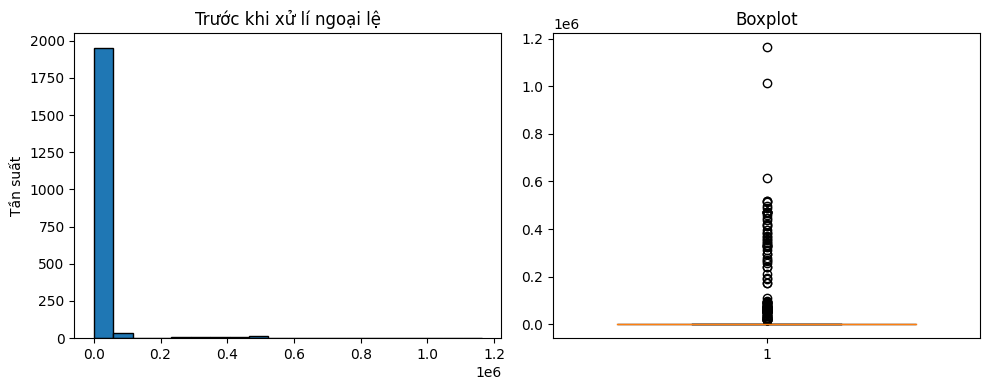

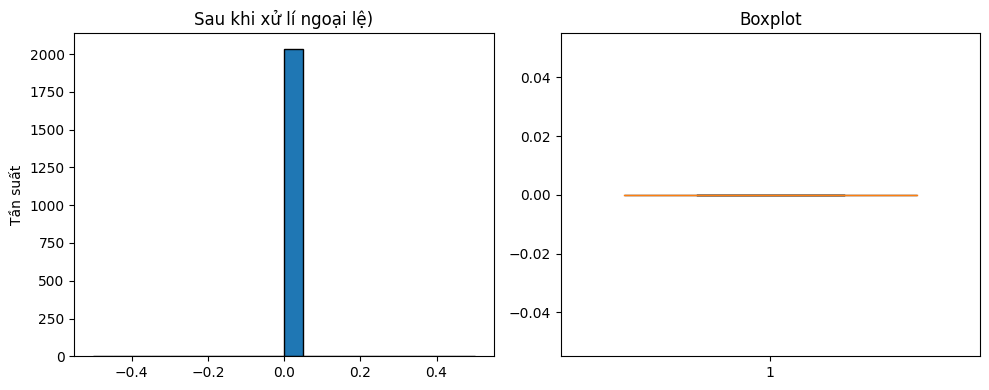

In [136]:
PlotData(X_train_first['Tax'],'Trước khi xử lí ngoại lệ','')
PlotData(X_train['Tax'],'Sau khi xử lí ngoại lệ)','')

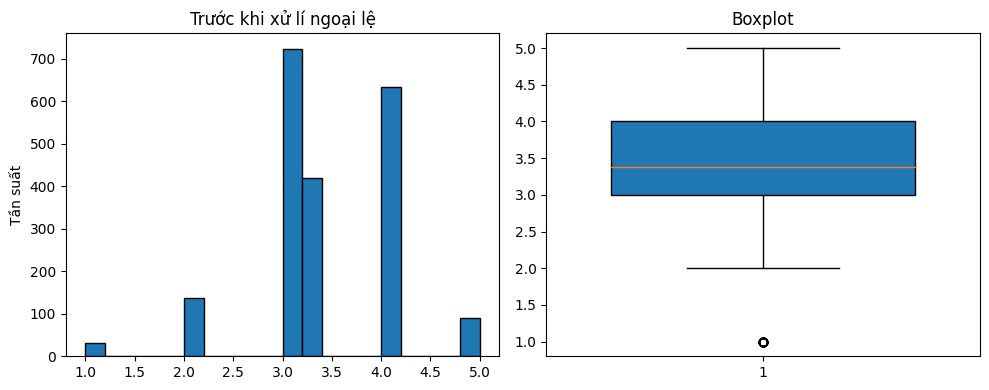

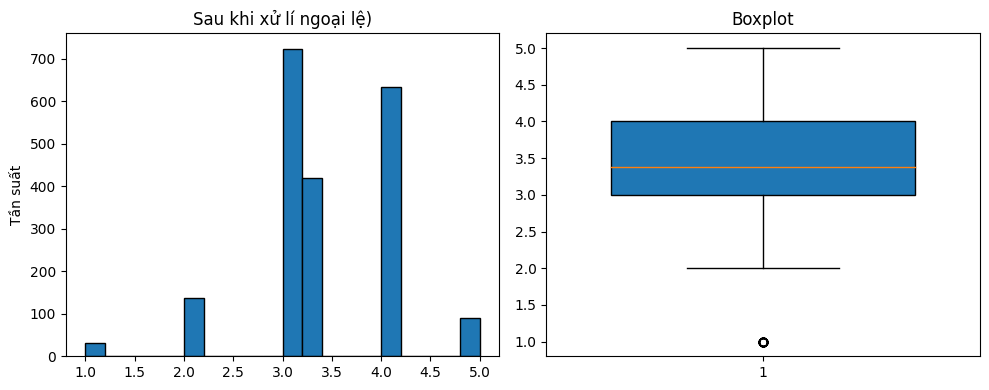

In [137]:
PlotData(X_train_first['Stars'],'Trước khi xử lí ngoại lệ','')
PlotData(X_train['Stars'],'Sau khi xử lí ngoại lệ)','')

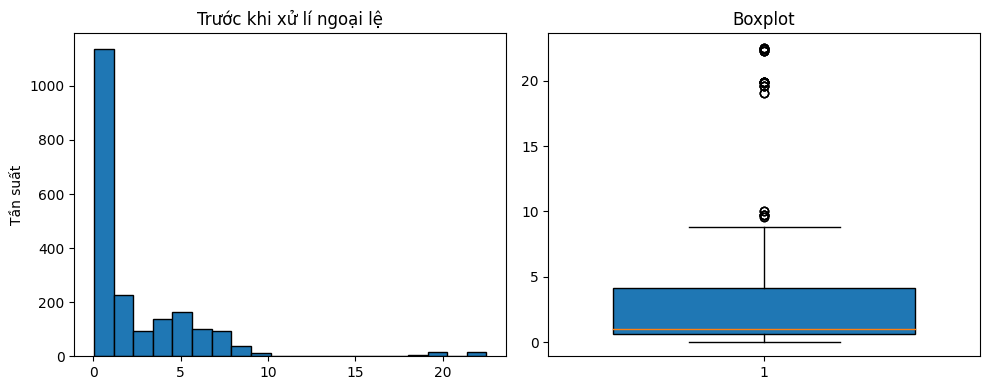

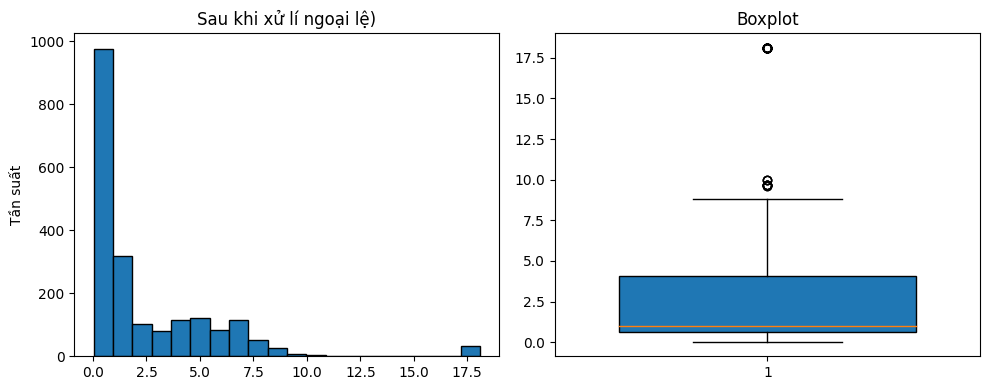

In [138]:
PlotData(X_train_first['Distance'],'Trước khi xử lí ngoại lệ','')
PlotData(X_train['Distance'],'Sau khi xử lí ngoại lệ)','')

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns) 
X_test =pd.DataFrame(scaler.transform(X_test),columns=X_test.columns) 

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

def PlotData(feature, title, xlabel):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Vẽ histogram
    axes[0].hist(feature, bins=20, color='skyblue', edgecolor='black')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Tần suất')
    axes[0].set_title(title)

    # Vẽ boxplot
    axes[1].boxplot(feature, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[1].set_xlabel(xlabel)
    axes[1].set_title('Boxplot')
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def SelectionFeature(X_train,y_train,X_test,y_test,numberOfFeature):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train =X_train
    y_train=y_train
    # Khởi tạo mô hình RandomForestRegressor
    rf_model = RandomForestRegressor(random_state = 40)

    # Sử dụng RFE để lựa chọn đặc trưng
    rfe = RFE(estimator=rf_model, n_features_to_select=numberOfFeature)
    X_trainelected = rfe.fit_transform(X_train, y_train)

    # Đánh giá mô hình với đặc trưng đã được chọn
    rf_model.fit(X_trainelected, y_train)
    X_test_selected = rfe.transform(X_test)
    score = rf_model.score(X_test_selected, y_test)

    # In kết quả
    print("Đặc trưng đã chọn:", rfe.support_)
    print("Độ quan trọng của đặc trưng:", rfe.ranking_)
    print("Điểm số trên tập validation:", score)
    selected_features = rfe.support_
    feature_names = X.columns
    selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features[i]]
    print("Selected Features:")
    for feature in selected_feature_names:
        print(feature)
        
    # Đánh giá mô hình với đặc trưng đã chọn trên tập kiểm tra
    y_pred = rf_model.predict(X_test_selected)
    # Tính toán MAE
    mae = mean_absolute_error(y_test, y_pred).round(4)
    # Tính toán MSE
    mse = mean_squared_error(y_test, y_pred).round(4)
    # Tính toán R2 Score
    r2 = r2_score(y_test, y_pred).round(4)
    # In kết quả
    print("MAE:", mae)
    print("MSE:", mse)
    print("R2 Score:", r2)
    return mae,mse,r2,selected_feature_names


In [142]:
maeArr=[]
mseArr=[]
r2ScoreArr=[]
selected_feature_names_Arr=[]
for i in range(1,13):
    print("-----------------------------------------------------")
    print("Số đặc trưng : ",i)
    mae,mse,r2,feature_names=SelectionFeature(X_train,y_train,X_test,y_test,i)
    maeArr.append(mae)
    mseArr.append(mse)
    r2ScoreArr.append(r2)
    selected_feature_names_Arr.append(feature_names)


-----------------------------------------------------
Số đặc trưng :  1
Đặc trưng đã chọn: [False  True False False False False False False False False False False]
Độ quan trọng của đặc trưng: [12  1  3  2  6 11  8  7 10  9  5  4]
Điểm số trên tập validation: 0.41160808727999765
Selected Features:
Stars
MAE: 353793.7278
MSE: 519895919600.8755
R2 Score: 0.4116
-----------------------------------------------------
Số đặc trưng :  2
Đặc trưng đã chọn: [False  True False  True False False False False False False False False]
Độ quan trọng của đặc trưng: [11  1  2  1  5 10  7  6  9  8  4  3]
Điểm số trên tập validation: 0.8018498325682081
Selected Features:
Stars
Number_of_review
MAE: 205208.3771
MSE: 175083071825.0231
R2 Score: 0.8018
-----------------------------------------------------
Số đặc trưng :  3
Đặc trưng đã chọn: [False  True  True  True False False False False False False False False]
Độ quan trọng của đặc trưng: [10  1  1  1  4  9  6  5  8  7  3  2]
Điểm số trên tập validatio

In [143]:
X_train

Tax         Stars  Distance  Number_of_review  Sustainable_level  \
0     0.0 -5.308740e-01 -0.531951          0.363933          -0.775054   
1     0.0  8.778164e-01 -0.597135          0.240027          -0.775054   
2     0.0 -5.308740e-01 -0.499358         -0.131693          -0.775054   
3     0.0  6.255842e-16 -0.662320          1.474328          -0.775054   
4     0.0  8.778164e-01 -0.808366          0.039870          -0.775054   
...   ...           ...       ...               ...                ...   
2030  0.0  8.778164e-01 -0.662320         -0.903727           1.548965   
2031  0.0 -5.308740e-01 -0.662320          1.893704          -0.775054   
2032  0.0  8.778164e-01  1.456177         -0.941852           0.774292   
2033  0.0 -5.308740e-01  0.152487         -0.613023          -0.775054   
2034  0.0 -5.308740e-01 -0.597135         -0.474819           0.774292   

      Discount  Free_Breakfast  is_Prepayment  is_NotablePlace  \
0          0.0       -0.740747      -0.592673              0.0   
1          0.0        1.349988      -0.592673              0.0   
2          0.0       -0.740747      -0.592673              0.0   
3          0.0       -0.740747       1.687270              0.0   
4          0.0        1.349988      -0.592673              0.0   
...        ...             ...            ...              ...   
2030       0.0        1.349988      -0.592673              0.0   
2031       0.0        1.349988      -0.592673              0.0   
2032       0.0        1.349988      -0.592673              0.0   
2033       0.0       -0.740747      -0.592673              0.0   
2034       0.0        1.349988      -0.592673              0.0   

      is_Free_Cancel  is_Sold_Out     Point  
0          -0.848648     1.219744  0.816939  
1          -0.848648    -0.819844  0.816939  
2           1.178345    -0.819844  0.518713  
3           1.178345    -0.819844 -2.463543  
4          -0.848648     1.219744 -0.375963  
...              ...          ...       ...  
2030       -0.848648    -0.819844 -0.525076  
2031       -0.848648    -0.819844  0.667826  
2032       -0.848648    -0.819844 -2.314430  
2033       -0.848648     1.219744 -2.016204  
2034        1.178345    -0.819844  0.369601  

[2035 rows x 12 columns]

In [144]:
result = {
    'MAE': maeArr,
    'MSE': mseArr,
    'R2_Score': r2ScoreArr,
    'Feature':selected_feature_names_Arr
}
result=pd.DataFrame(result)
result['Số đặc trưng'] = range(1, len(result) + 1)
result.style.background_gradient(cmap='Greens')


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

def ResultFeatureSelection(arr, ylabel):
    plt.figure(figsize=(10, 5))
    # Dữ liệu MAE
    # Tạo mảng indices cho trục x
    x_values = range(1, 13)
    # Vẽ biểu đồ đường
    sns.lineplot(x=x_values, y=arr, marker='o')
    # Đặt tên cho trục x và trục y
    plt.xlabel('Số đặc trưng')
    plt.ylabel(ylabel)
    # Đặt tiêu đề cho biểu đồ
    plt.title('Biểu đồ đường')
    # Thiết lập các đỉnh núi trên trục x
    plt.xticks(range(1, 13))
    # Thêm lưới
    plt.grid(True)
    
    # Thêm số vào biểu đồ
    for i, value in enumerate(arr):
        plt.text(i+1, value, str(value), ha='center', va='bottom')
    
    # Hiển thị biểu đồ
    plt.show()


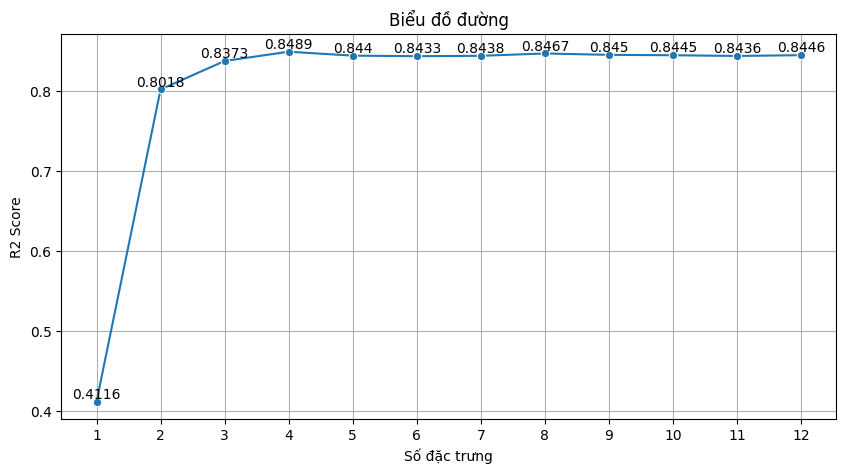

In [146]:
# ResultFeatureSelection(mseArr,'MSE')
# ResultFeatureSelection(maeArr,'MAE')
ResultFeatureSelection(r2ScoreArr,'R2 Score')

**Nhìn vào bảng đó, thi ta nên lựa chọn 8 đặc trưng: [S'Stars', 'Distance', 'Number_of_review', 'Free_Breakfast', 'Point']**

In [147]:
X_train

Tax         Stars  Distance  Number_of_review  Sustainable_level  \
0     0.0 -5.308740e-01 -0.531951          0.363933          -0.775054   
1     0.0  8.778164e-01 -0.597135          0.240027          -0.775054   
2     0.0 -5.308740e-01 -0.499358         -0.131693          -0.775054   
3     0.0  6.255842e-16 -0.662320          1.474328          -0.775054   
4     0.0  8.778164e-01 -0.808366          0.039870          -0.775054   
...   ...           ...       ...               ...                ...   
2030  0.0  8.778164e-01 -0.662320         -0.903727           1.548965   
2031  0.0 -5.308740e-01 -0.662320          1.893704          -0.775054   
2032  0.0  8.778164e-01  1.456177         -0.941852           0.774292   
2033  0.0 -5.308740e-01  0.152487         -0.613023          -0.775054   
2034  0.0 -5.308740e-01 -0.597135         -0.474819           0.774292   

      Discount  Free_Breakfast  is_Prepayment  is_NotablePlace  \
0          0.0       -0.740747      -0.592673              0.0   
1          0.0        1.349988      -0.592673              0.0   
2          0.0       -0.740747      -0.592673              0.0   
3          0.0       -0.740747       1.687270              0.0   
4          0.0        1.349988      -0.592673              0.0   
...        ...             ...            ...              ...   
2030       0.0        1.349988      -0.592673              0.0   
2031       0.0        1.349988      -0.592673              0.0   
2032       0.0        1.349988      -0.592673              0.0   
2033       0.0       -0.740747      -0.592673              0.0   
2034       0.0        1.349988      -0.592673              0.0   

      is_Free_Cancel  is_Sold_Out     Point  
0          -0.848648     1.219744  0.816939  
1          -0.848648    -0.819844  0.816939  
2           1.178345    -0.819844  0.518713  
3           1.178345    -0.819844 -2.463543  
4          -0.848648     1.219744 -0.375963  
...              ...          ...       ...  
2030       -0.848648    -0.819844 -0.525076  
2031       -0.848648    -0.819844  0.667826  
2032       -0.848648    -0.819844 -2.314430  
2033       -0.848648     1.219744 -2.016204  
2034        1.178345    -0.819844  0.369601  

[2035 rows x 12 columns]

In [148]:
X_train = X_train[['Stars', 'Distance', 'Number_of_review', 'Point']]
X_test = X_test[['Stars', 'Distance', 'Number_of_review', 'Point']]

In [149]:
X_train

Stars  Distance  Number_of_review     Point
0    -5.308740e-01 -0.531951          0.363933  0.816939
1     8.778164e-01 -0.597135          0.240027  0.816939
2    -5.308740e-01 -0.499358         -0.131693  0.518713
3     6.255842e-16 -0.662320          1.474328 -2.463543
4     8.778164e-01 -0.808366          0.039870 -0.375963
...            ...       ...               ...       ...
2030  8.778164e-01 -0.662320         -0.903727 -0.525076
2031 -5.308740e-01 -0.662320          1.893704  0.667826
2032  8.778164e-01  1.456177         -0.941852 -2.314430
2033 -5.308740e-01  0.152487         -0.613023 -2.016204
2034 -5.308740e-01 -0.597135         -0.474819  0.369601

[2035 rows x 4 columns]

In [150]:
X_train_randomforest=X_train.copy()
X_test_randomforest=X_test.copy()
y_train_randomforest=y_train.copy()
y_test_randomforest=y_test.copy()

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình RandomForestRegressor
model = RandomForestRegressor(random_state=40)

# Định nghĩa các tham số siêu cho mô hình
param_grid = {
    'n_estimators': [50, 100, 200, 300],
}

# Tìm kiếm siêu tham số tối ưu với GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_randomforest, y_train_randomforest)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40),
             param_grid={'n_estimators': [50, 100, 200, 300]}, scoring='r2')

In [152]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 300}


In [153]:
model = RandomForestRegressor(random_state=40,n_estimators = 300)

model.fit(X_train_randomforest, y_train_randomforest)
y_pred_test = model.predict(X_test_randomforest)
r2_random = r2_score(y_test_randomforest,y_pred_test).round(2)
mae_random = mean_absolute_error(y_test_randomforest,y_pred_test).round(2)
mse_random = mean_squared_error(y_test_randomforest, y_pred_test).round(2)
print("R2 score:",r2_random )

print('MSE:',mse_random )

print('MAE:',mae_random)

R2 score: 0.85474
MSE: 128351318689.90968
MAE: 157234.34482


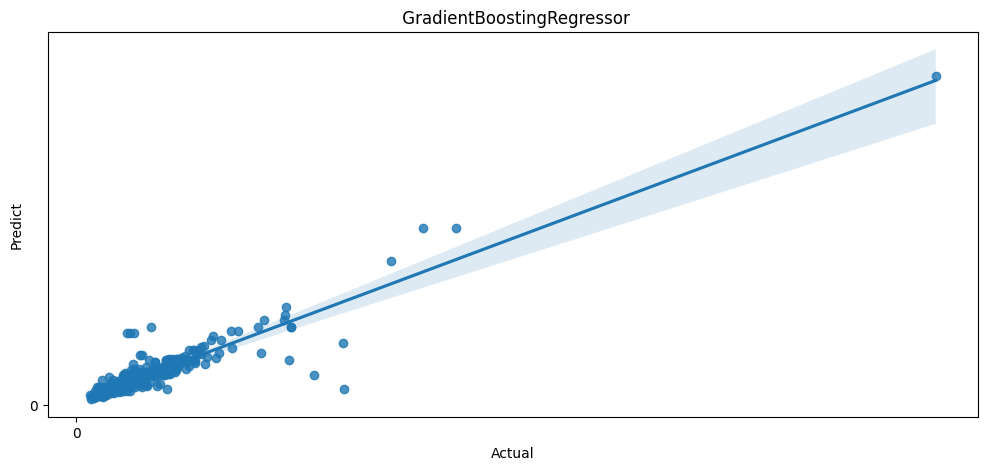

In [154]:
fig, axes = plt.subplots(figsize=(12, 5))
sns.regplot(x=y_test_randomforest, y=y_pred_test, ax=axes)
axes.set_title(' GradientBoostingRegressor')
axes.set_xlabel('Actual')
axes.set_ylabel('Predict')
axes.set_xticks(range(0, 1, 10))
axes.set_yticks(range(0, 1, 10))

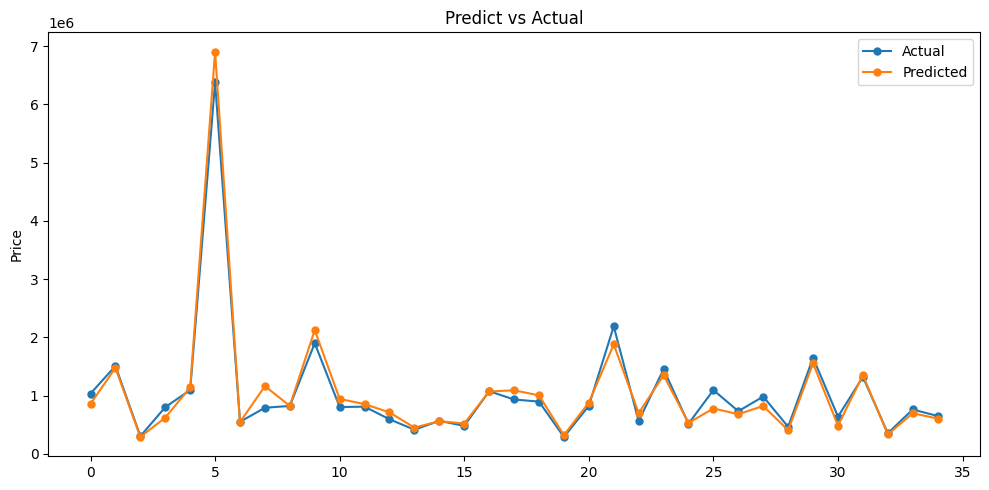

In [155]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(figsize=(10, 5))

axes.set_ylabel("Price")
axes.set_title('Predict vs Actual')
axes.plot(np.array(y_test_randomforest[0:35]), 'o-', label='Actual', markersize=5)
axes.plot(y_pred_test[0:35],'o-', label='Predicted', markersize=5)
axes.legend()
plt.tight_layout()
plt.show()


In [156]:
X_train_gradient = X_train.copy()
X_test_gradient = X_test.copy()
y_train_gradient = y_train.copy()
y_test_gradient = y_test.copy()

In [157]:
model = GradientBoostingRegressor(random_state=40)
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.05, 0.1, 0.15],  
    'max_depth': [2, 3, 4, 5]  
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_gradient, y_train_gradient)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=40),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [158]:
best_model = grid_search.best_estimator_
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100}


In [159]:
model = GradientBoostingRegressor(random_state=40, n_estimators=100, max_depth=3, learning_rate=0.15)

model.fit(X_train_gradient, y_train_gradient)

y_pred_test = model.predict(X_test_gradient)
r2_gradient = r2_score(y_test_gradient,y_pred_test).round(2)
mse_gradient = mean_squared_error(y_test_gradient, y_pred_test).round(2)
mae_gradient = mean_absolute_error(y_test_gradient,y_pred_test).round(2)

print("R2 score :", r2_gradient)

print('MSE :', mse_gradient)

print('MAE :',mae_gradient)

R2 score : 0.84376
MSE : 138053450193.0148
MAE : 238294.46267


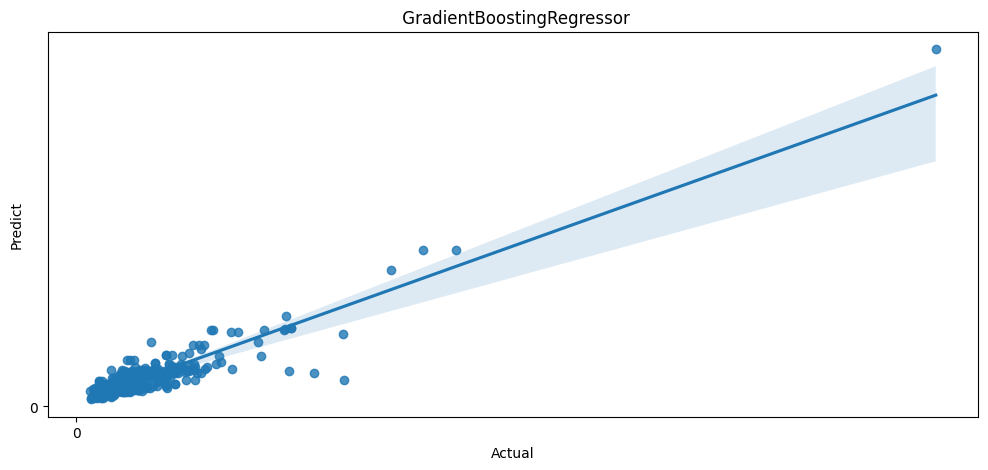

In [160]:
fig, axes = plt.subplots(figsize=(12, 5))
sns.regplot(x=y_test_gradient, y=y_pred_test, ax=axes)
axes.set_title(' GradientBoostingRegressor')
axes.set_xlabel('Actual')
axes.set_ylabel('Predict')
axes.set_xticks(range(0, 1, 10))
axes.set_yticks(range(0, 1, 10))

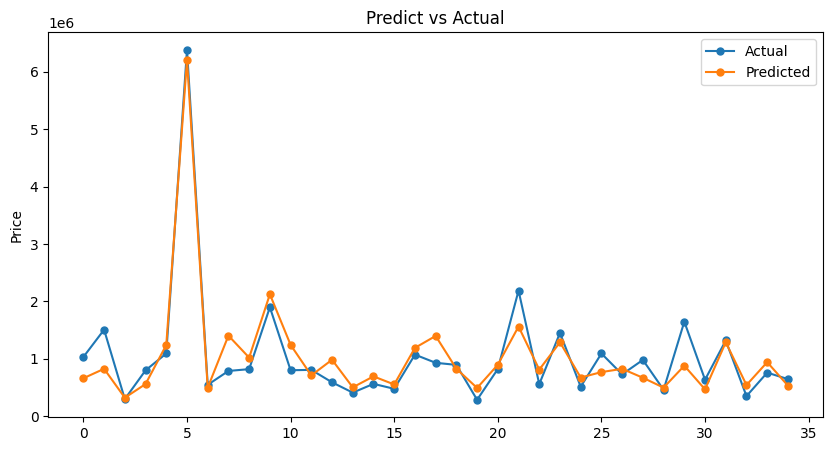

In [161]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(figsize=(10,5))

axes.set_ylabel("Price")
axes.set_title('Predict vs Actual')
axes.plot(np.array(y_test_gradient[0:35]), 'o-', label='Actual', markersize=5)
axes.plot(y_pred_test[0:35], 'o-', label='Predicted', markersize=5)
axes.legend()
# plt.tight_layout()
plt.show()


In [162]:
X_train_XGB = X_train.copy()
X_test_XGB= X_test.copy()
y_train_XGB = y_train.copy()
y_test_XGB = y_test.copy()

In [163]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model = XGBRegressor(random_state=40)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.4,0.5, 0.6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_XGB, y_train_XGB)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [164]:
best_model = grid_search.best_estimator_
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 100}


In [165]:
model = XGBRegressor(random_state=40,
              learning_rate=0.4, 
              max_depth=5,
             n_estimators=100)

model.fit(X_train_XGB, y_train_XGB)
y_pred_test = model.predict(X_test_XGB)
r2_XGB = r2_score(y_test_XGB,y_pred_test).round(2)
mae_XGB = mean_absolute_error(y_test_XGB,y_pred_test).round(2)
mse_XGB =  mean_squared_error(y_test_XGB, y_pred_test).round(2)
print("R2 score",r2_XGB )

print('MSE ',mse_XGB)

print('MAE :',mae_XGB)

R2 score 0.85341
MSE  129523615452.52054
MAE : 162917.55133


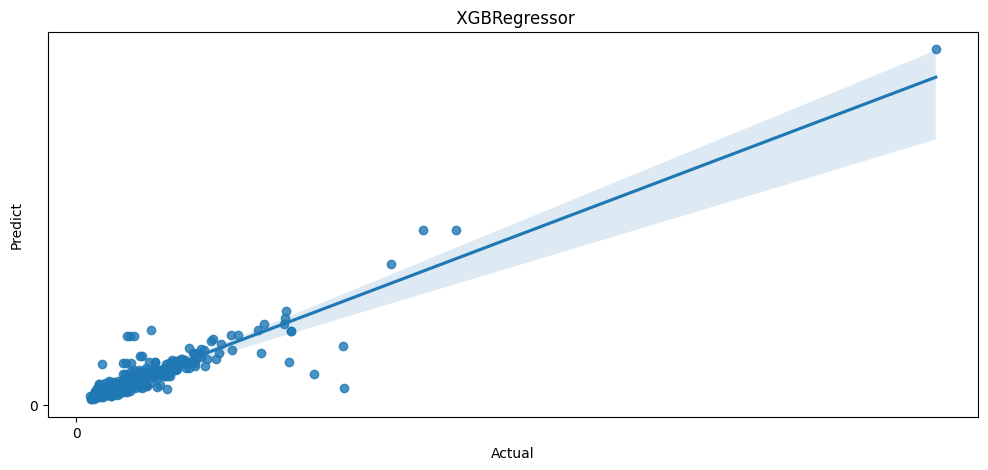

In [166]:
fig, axes = plt.subplots(figsize=(12, 5))
sns.regplot(x=y_test_XGB, y=y_pred_test, ax=axes)
axes.set_title(' XGBRegressor')
axes.set_xlabel('Actual')
axes.set_ylabel('Predict')
axes.set_xticks(range(0, 1, 10))
axes.set_yticks(range(0, 1, 10))

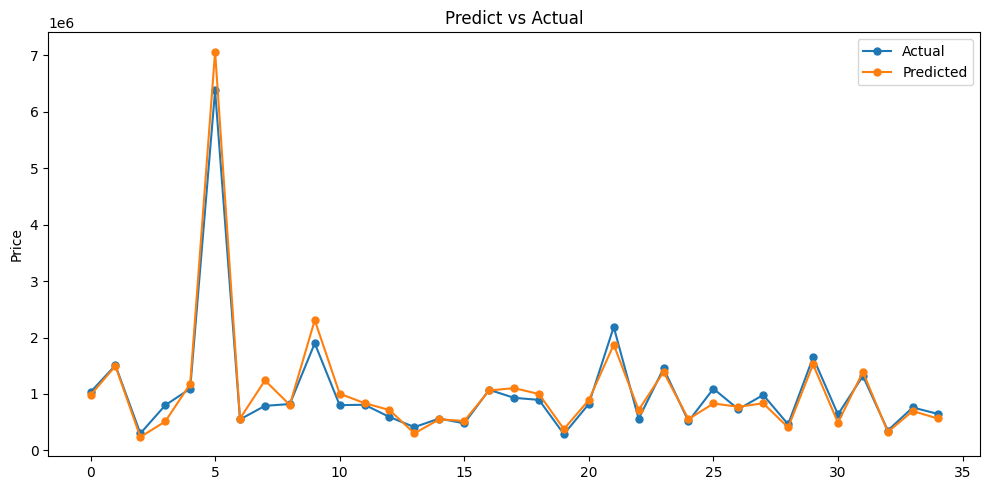

In [167]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(figsize=(10,5))

axes.set_ylabel("Price")
axes.set_title('Predict vs Actual')
axes.plot(np.array(y_test_XGB[0:35]), 'o-', label='Actual', markersize=5)
axes.plot(y_pred_test[0:35], 'o-', label='Predicted', markersize=5)
axes.legend()
plt.tight_layout()
plt.show()


In [168]:
import pandas as pd
from tabulate import tabulate

# Create data for each model
data_gradient = {
    'Metric': ['R2-score', 'MAE', 'MSE'],
    '(Test)': [r2_gradient, mae_gradient, mse_gradient],
}

data_random = {
    'Metric': ['R2-score', 'MAE', 'MSE'],
    '(Test)': [r2_random, mae_random, mse_random],
}

data_XGB = {
    'Metric': ['R2-score', 'MAE', 'MSE'],
    '(Test)': [r2_XGB, mae_XGB, mse_XGB],
}

# Create DataFrames
df_gradient = pd.DataFrame(data_gradient)
df_random = pd.DataFrame(data_random)
df_XGB = pd.DataFrame(data_XGB)

# Merge DataFrames
df_combined = pd.concat([df_gradient, df_random['(Test)'], df_XGB['(Test)']],
                        keys=['Gradient', 'Random', 'XGB'], axis=1)

# Print the table
print(tabulate(df_combined, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════╤══════════════════════════╤════════════════════════╤═════════════════════╕
│    │ ('Gradient', 'Metric')   │   ('Gradient', '(Test)') │   ('Random', '(Test)') │   ('XGB', '(Test)') │
╞════╪══════════════════════════╪══════════════════════════╪════════════════════════╪═════════════════════╡
│  0 │ R2-score                 │              0.84376     │            0.85474     │         0.85341     │
├────┼──────────────────────────┼──────────────────────────┼────────────────────────┼─────────────────────┤
│  1 │ MAE                      │         238294           │       157234           │    162918           │
├────┼──────────────────────────┼──────────────────────────┼────────────────────────┼─────────────────────┤
│  2 │ MSE                      │              1.38053e+11 │            1.28351e+11 │         1.29524e+11 │
╘════╧══════════════════════════╧══════════════════════════╧════════════════════════╧═════════════════════╛


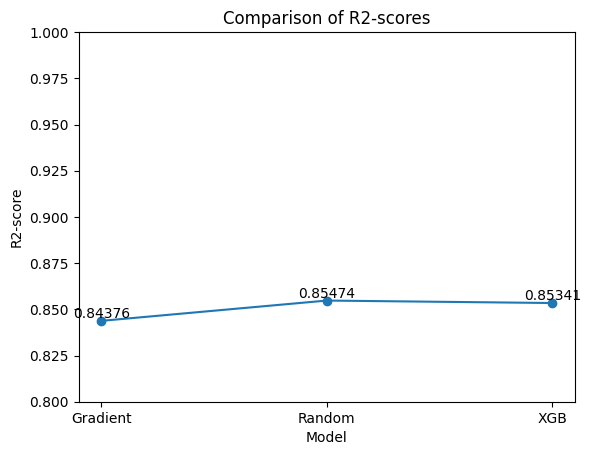

In [191]:
import matplotlib.pyplot as plt

# R2-scores of the models
r2_scores = [r2_gradient, r2_random, r2_XGB]
models = ['Gradient', 'Random', 'XGB']

# Create a line plot
plt.plot(models, r2_scores, marker='o')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('R2-score')
plt.title('Comparison of R2-scores')

# Set the y-axis limit
plt.ylim(bottom=0.8, top=1.0)  # Adjust the values as per your requirement

# Add numbers to each point
for i, score in enumerate(r2_scores):
    plt.text(models[i], score, str(score), ha='center', va='bottom')
# Display the plot
plt.show()


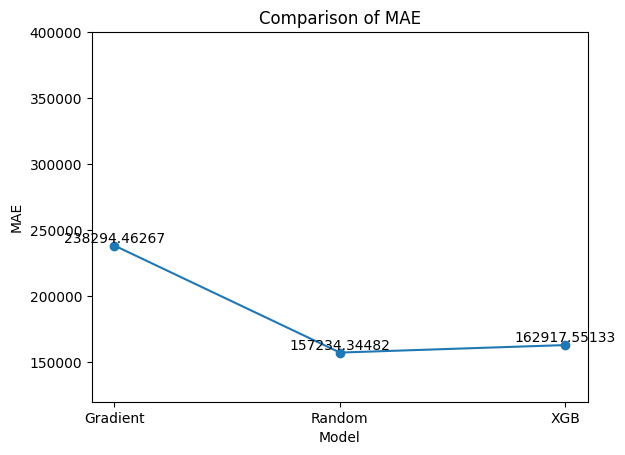

In [190]:
import matplotlib.pyplot as plt

# R2-scores of the models
mae = [mae_gradient, mae_random, mae_XGB]
models = ['Gradient', 'Random', 'XGB']

# Create a line plot
plt.plot(models, mae, marker='o')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Comparison of MAE')
plt.ylim(bottom=120000, top=400000)

# Add numbers to each point
for i, ma in enumerate(mae):
    plt.text(models[i], ma, str(ma), ha='center', va='bottom')

# Display the plot
plt.show()


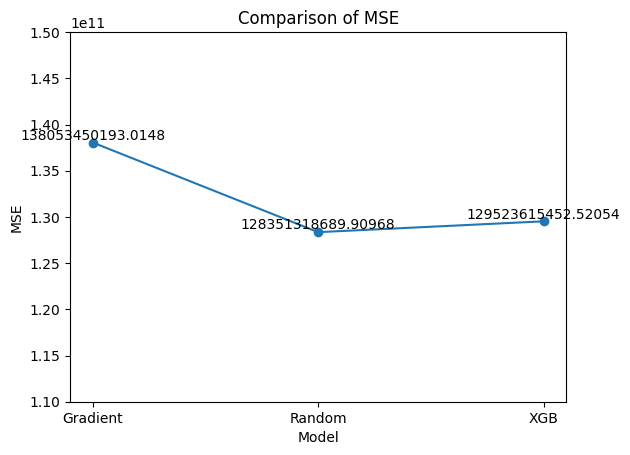

In [192]:
import matplotlib.pyplot as plt

# R2-scores of the models
mse = [mse_gradient, mse_random, mse_XGB]
models = ['Gradient', 'Random', 'XGB']

# Create a line plot
plt.plot(models, mse, marker='o')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.ylim(bottom=1.1e11, top=1.5e11)

for i, ms in enumerate(mse):
    plt.text(models[i], ms, str(ms), ha='center', va='bottom')
# Display the plot
plt.show()
